# Airbnb Market Trends

## Importing libraries and data

In [103]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [54]:
# Importing the data

price = pd.read_csv('data/airbnb_price.csv')
last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')
room_type = pd.read_excel('data/airbnb_room_type.xlsx')

## Data preparation

In [55]:
# Price dataset
price.info()
price.head()

price.nbhood_full = price.nbhood_full.astype('category')
price.price = price.price.str.removesuffix(' dollars').astype('int32')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [56]:
# Last_review dataset
last_review.info()
last_review.host_name = last_review.host_name.astype('category')
last_review.last_review = last_review.last_review.astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [60]:
# Room_type
room_type.info()
room_type.room_type = room_type.room_type.str.lower()
room_type.room_type.nunique()
room_type.room_type = room_type.room_type.astype('category')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   description  25199 non-null  object
 2   room_type    25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


## Data exploration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int32   
 2   nbhood_full  25209 non-null  category
dtypes: category(1), int32(1), int64(1)
memory usage: 354.6 KB


<Axes: xlabel='price', ylabel='Count'>

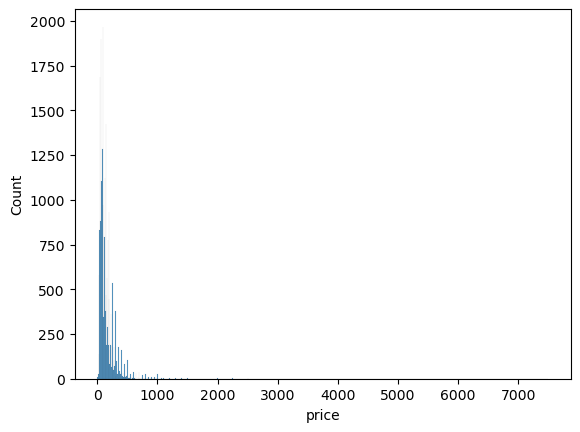

In [61]:
# Price dataset
price.info()
sns.histplot(data=price, x='price')

,mean,std,min,max
nbhood_full,,,,
"Brooklyn, Sea Gate",805.000000,961.665222,125,1485
"Manhattan, Tribeca",396.704918,313.922195,80,2000
"Manhattan, Flatiron District",342.055556,267.057291,65,1500
"Manhattan, NoHo",335.024390,273.300612,80,1795
"Manhattan, SoHo",299.162304,350.522572,45,3000
...,...,...,...,...
"Staten Island, Bull's Head",48.000000,28.583212,25,80
"Queens, Little Neck",45.000000,NaN,45,45
"Bronx, Hunts Point",42.750000,9.696532,35,65


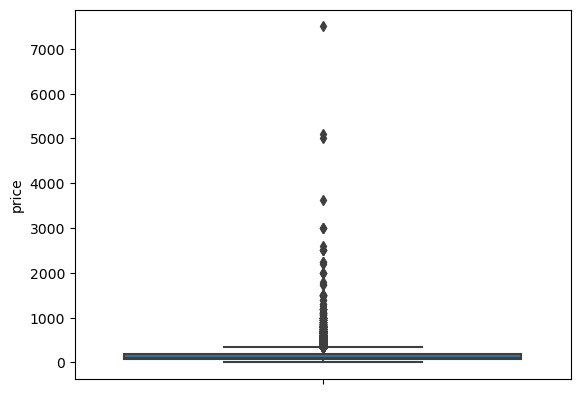

In [62]:
sns.boxplot(data=price, y='price')
price.groupby('nbhood_full')['price'].agg(['mean', 'std', 'min', 'max']).sort_values(by='mean', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   description  25199 non-null  object  
 2   room_type    25209 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 418.8+ KB


/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


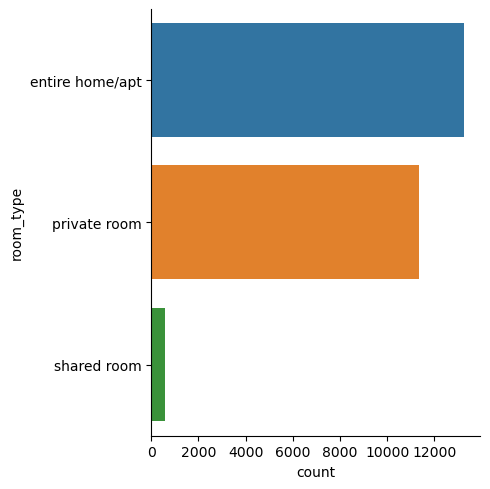

In [65]:
# room_type dataset

room_type.info()
room_type.room_type.nunique()
sns.catplot(data=room_type, y='room_type', kind='count')

## Joining data for further exploration

In [71]:
data = price.copy(deep=True)
data = data.merge(room_type, on='listing_id')
data = data.merge(last_review, on='listing_id')

print(price.info())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int32   
 2   nbhood_full  25209 non-null  category
dtypes: category(1), int32(1), int64(1)
memory usage: 354.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   listing_id   25209 non-null  int64   
 1   price        25209 non-null  int32   
 2   nbhood_full  25209 non-null  category
 3   description  25199 non-null  object  
 4   room_type    25209 non-null  category
 5   host_name    25201 non-null  category
 6   last_review  25209 non-null  category
dtypes: category(4), int32(1), int64(1), object(1)
memory usage: 995.9+ KB
None


## Data exploration with the complete data set

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


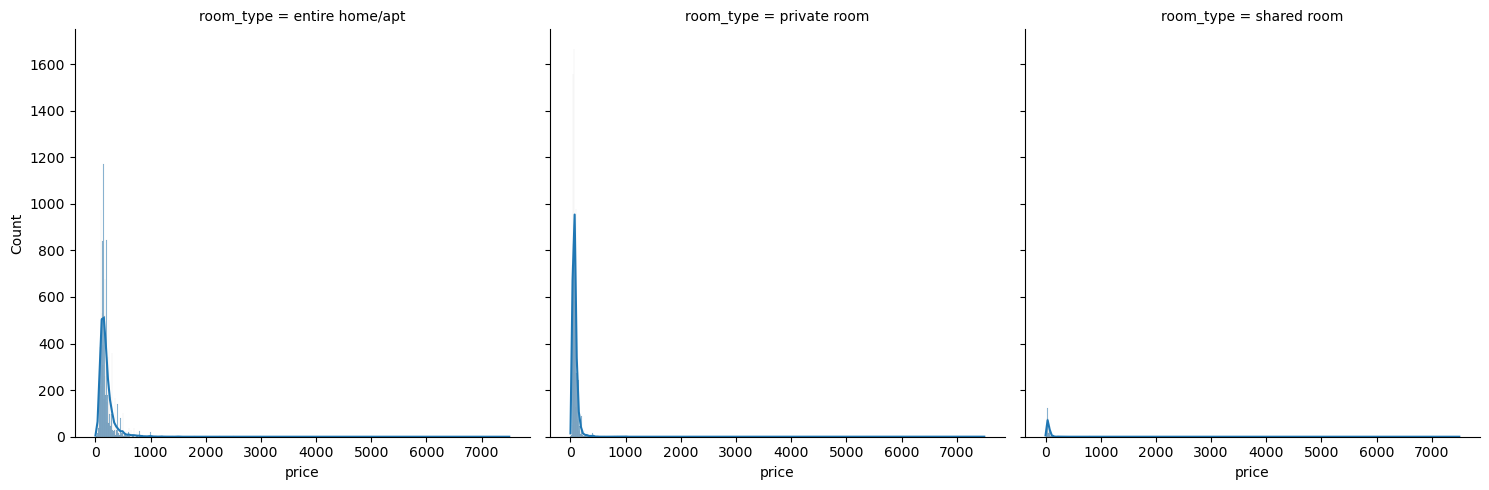

In [78]:
sns.displot(data=data, x='price', col_wrap=3, col='room_type', kde=True)

/home/carlos/.conda/envs/conda_data_analysis/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


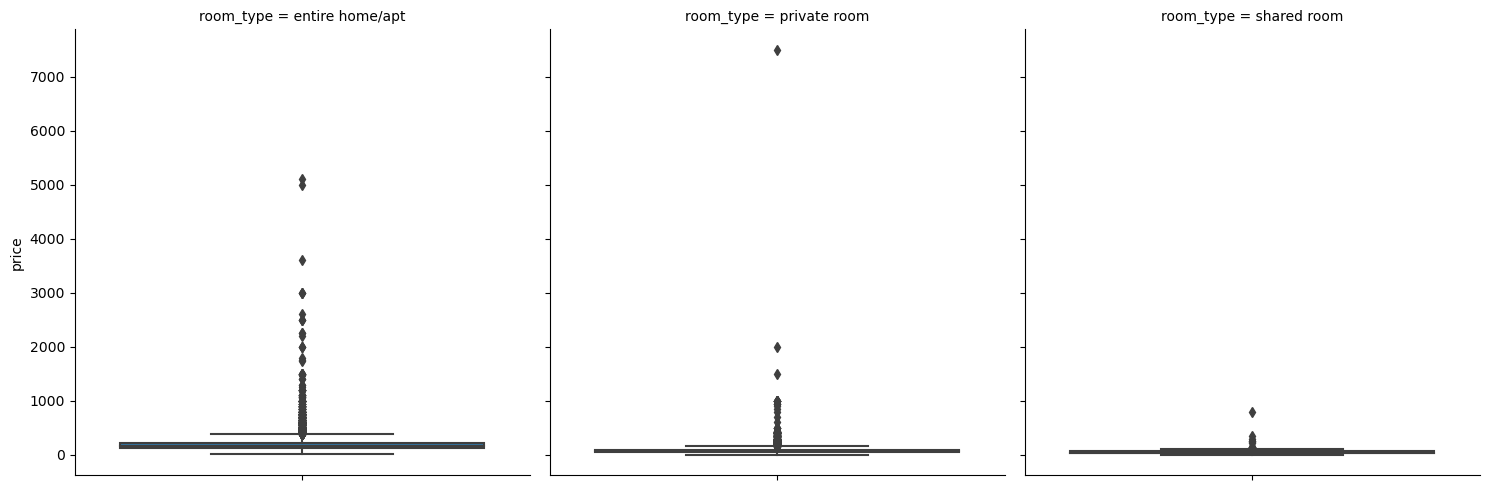

In [76]:
sns.catplot(data=data, y='price', col='room_type', kind='box')

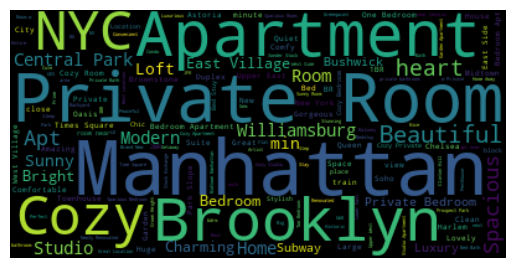

In [104]:
# Wordcloud

description = ''
# print(type(description))
for _, d in data.description.items():
    description = ", ".join([description, str(d)])

stopwords = set(STOPWORDS)
wc_descriptions = WordCloud(stopwords=stopwords).generate(description)
plt.imshow(wc_descriptions, interpolation='bilinear')
plt.axis('off')
plt.show()

In [95]:
# Sentiment analysis for the desciption



wdwfefce
